In [18]:
# load the pt-pt json file into a dataframe
import pandas as pd
import os 

df = pd.DataFrame()

for json_file in os.listdir('dataset/jsonl'):
    df = pd.concat([df, pd.read_json('dataset/jsonl/' + json_file, lines=True)], ignore_index=True)
    print(f"Added {json_file} to dataframe")

Added af-ZA.jsonl to dataframe
Added am-ET.jsonl to dataframe
Added ar-SA.jsonl to dataframe
Added az-AZ.jsonl to dataframe
Added bn-BD.jsonl to dataframe
Added cy-GB.jsonl to dataframe
Added da-DK.jsonl to dataframe
Added de-DE.jsonl to dataframe
Added el-GR.jsonl to dataframe
Added en-US.jsonl to dataframe
Added es-ES.jsonl to dataframe
Added fa-IR.jsonl to dataframe
Added fi-FI.jsonl to dataframe
Added fr-FR.jsonl to dataframe
Added he-IL.jsonl to dataframe
Added hi-IN.jsonl to dataframe
Added hu-HU.jsonl to dataframe
Added hy-AM.jsonl to dataframe
Added id-ID.jsonl to dataframe
Added is-IS.jsonl to dataframe
Added it-IT.jsonl to dataframe
Added ja-JP.jsonl to dataframe
Added jv-ID.jsonl to dataframe
Added ka-GE.jsonl to dataframe
Added km-KH.jsonl to dataframe
Added kn-IN.jsonl to dataframe
Added ko-KR.jsonl to dataframe
Added lv-LV.jsonl to dataframe
Added ml-IN.jsonl to dataframe
Added mn-MN.jsonl to dataframe
Added ms-MY.jsonl to dataframe
Added my-MM.jsonl to dataframe
Added nb

In [22]:
df_burmese = df[df['locale'] == 'my']
df_burmese.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,slot_method,judgments
512151,0,my,test,alarm,2,ဒီတစ်ပါတ် မနက်ငါးနာရီ ငါ့ကိုနှိုးပါ,[date : ဒီတစ်ပါတ်] [time : မနက်ငါးနာရီ] ငါ့ကို...,42,"[{'slot': 'time', 'method': 'translation'}, {'...","[{'worker_id': '39', 'intent_score': 1, 'slots..."
512152,1,my,train,alarm,2,ငါ့ကို သောကြာနေ့ ရဲ့ မနက်ကိုးနာရီ မှာ နှိုးပေးပါ,ငါ့ကို [date : သောကြာနေ့] ရဲ့ [time : မနက်ကိုး...,33,"[{'slot': 'time', 'method': 'translation'}, {'...","[{'worker_id': '90', 'intent_score': 1, 'slots..."
512153,2,my,train,alarm,2,အခုကနေ နှစ်နာရီ ကြာ နှိုးစက်သတ်မှတ်ပါ,[time : အခုကနေ နှစ်နာရီ] ကြာ နှိုးစက်သတ်မှတ်ပါ,46,"[{'slot': 'time', 'method': 'translation'}]","[{'worker_id': '48', 'intent_score': 1, 'slots..."
512154,3,my,test,audio,4,တိတ်တိတ်နေပါ,တိတ်တိတ်နေပါ,71,[],"[{'worker_id': '62', 'intent_score': 1, 'slots..."
512155,4,my,train,audio,4,olly တိတ်တိတ်နေပါ,olly တိတ်တိတ်နေပါ,71,[],"[{'worker_id': '21', 'intent_score': 1, 'slots..."


In [2]:
%run -i "preprocess_lang.ipynb"
%run -i "preprocess_nolang.ipynb"
%run -i "evaluation.ipynb"

In [21]:
df["locale"] = df["locale"].apply(lambda x: x.split("-")[0])
df, encoder = encode_labels(df)

In [4]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,slot_method,judgments
0,0,af,test,alarm,2,maak my wakker om vyf v. m. die week,maak my wakker om [time : vyf v. m.] [date : d...,37,"[{'slot': 'time', 'method': 'localization'}, {...","[{'worker_id': '20', 'intent_score': 1, 'slots..."
1,1,af,train,alarm,2,maak my wakker nege-uur v. m. op vrydag,maak my wakker [time : nege-uur v. m.] op [dat...,20,"[{'slot': 'time', 'method': 'translation'}, {'...","[{'worker_id': '40', 'intent_score': 1, 'slots..."
2,2,af,train,alarm,2,stel 'n alarm vir twee ure van nou af,stel 'n alarm vir [time : twee ure van nou af],20,"[{'slot': 'time', 'method': 'translation'}]","[{'worker_id': '64', 'intent_score': 1, 'slots..."
3,3,af,test,audio,4,stil,stil,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."
4,4,af,train,audio,4,janneman stilte,janneman stilte,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."


calendar          120870
play              103224
qa                 85935
email              70431
iot                56457
general            49113
weather            43605
transport          41055
lists              40443
news               36159
recommendation     30396
datetime           29478
social             28815
alarm              28050
music              23919
audio              19737
takeaway           18258
cooking            16626
Name: scenario, dtype: int64
calendar          0.143454
play              0.122511
qa                0.101991
email             0.083591
iot               0.067006
general           0.058289
weather           0.051752
transport         0.048726
lists             0.048000
news              0.042915
recommendation    0.036075
datetime          0.034986
social            0.034199
alarm             0.033291
music             0.028388
audio             0.023425
takeaway          0.021669
cooking           0.019732
Name: scenario, dtype: float64


<AxesSubplot: >

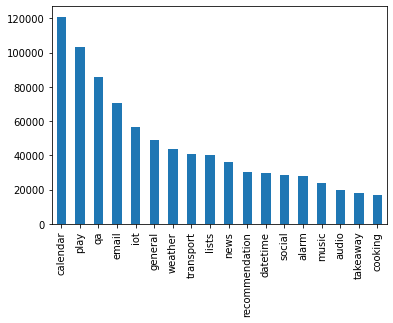

In [5]:
print(df['scenario'].value_counts())

print(df['scenario'].value_counts(normalize=True))

df['scenario'].value_counts().plot(kind='bar')

zh    33042
ru    16521
lv    16521
ml    16521
mn    16521
ms    16521
my    16521
nb    16521
nl    16521
pl    16521
pt    16521
ro    16521
sl    16521
am    16521
sq    16521
sv    16521
sw    16521
ta    16521
te    16521
th    16521
tl    16521
tr    16521
ur    16521
vi    16521
ko    16521
af    16521
km    16521
ka    16521
ar    16521
az    16521
bn    16521
cy    16521
da    16521
de    16521
el    16521
en    16521
es    16521
fa    16521
fi    16521
fr    16521
he    16521
hi    16521
hu    16521
hy    16521
id    16521
is    16521
it    16521
ja    16521
jv    16521
kn    16521
Name: locale, dtype: int64
zh    0.039216
ru    0.019608
lv    0.019608
ml    0.019608
mn    0.019608
ms    0.019608
my    0.019608
nb    0.019608
nl    0.019608
pl    0.019608
pt    0.019608
ro    0.019608
sl    0.019608
am    0.019608
sq    0.019608
sv    0.019608
sw    0.019608
ta    0.019608
te    0.019608
th    0.019608
tl    0.019608
tr    0.019608
ur    0.019608
vi    0.019608
ko    0.01960

<AxesSubplot: >

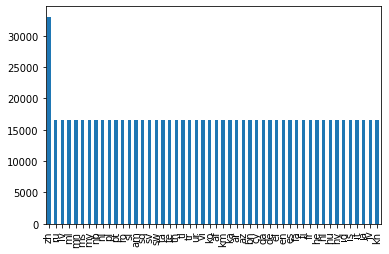

In [6]:
print(df['locale'].value_counts())

print(df['locale'].value_counts(normalize=True))

df['locale'].value_counts().plot(kind='bar')

<AxesSubplot: >

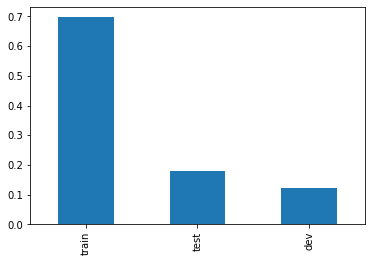

In [7]:
# plot the distribution of partitions with the percentage of each partition
df['partition'].value_counts(normalize=True).plot(kind='bar')

In [8]:
training_df = df[df['partition'] != 'test']
testing_df = df[(df['partition'] == 'test')]

In [9]:
training_df.reset_index(drop=True, inplace=True)
testing_df.reset_index(drop=True, inplace=True)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
vectorizer.fit(training_df['utt'].values)

CountVectorizer()

In [11]:
input_cols = [f'__{feature_name}' for feature_name in vectorizer.get_feature_names_out()]
output_cols = ['intent']

training_inputs = vectorizer.transform(training_df['utt'].values)
testing_inputs = vectorizer.transform(testing_df['utt'].values)
training_classes = training_df[output_cols].values.reshape(-1)
testing_classes = testing_df[output_cols].values.reshape(-1)

In [12]:
indices = {}

for lang in testing_df['locale'].unique():
    indices[lang] = testing_df.index[(testing_df['locale'] == lang)].values

In [13]:
print(vectorizer.get_feature_names_out())

['a5' 'aa' 'aabot' ... '힘들었어' '힙합' '２つめのポッドキャストを再生して']


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

clf = MultinomialNB()
clf.fit(training_inputs, training_classes)

MultinomialNB()

Evaluation metrics for MultinomialNB
MultinomialNB's default score metric: 0.6271542914408534
Classification report
              precision    recall  f1-score   support

           0     0.9228    0.4689    0.6218      1734
           1     0.9850    0.3063    0.4672      1071
           2     0.6586    0.5323    0.5887      2091
           3     0.9622    0.3173    0.4772       561
           4     0.9169    0.3315    0.4869      1632
           5     1.0000    0.0033    0.0065       306
           6     0.4177    0.4057    0.4116       663
           7     0.4499    0.6050    0.5161      6426
           8     0.7683    0.6716    0.7167      3417
           9     0.3349    0.9400    0.4938     10659
          11     0.9261    0.5291    0.6735      3672
          12     0.9727    0.1399    0.2446       765
          13     0.7531    0.7286    0.7407      4488
          14     0.6881    0.1225    0.2080       612
          15     0.7569    0.8372    0.7950      6069
          16     0.

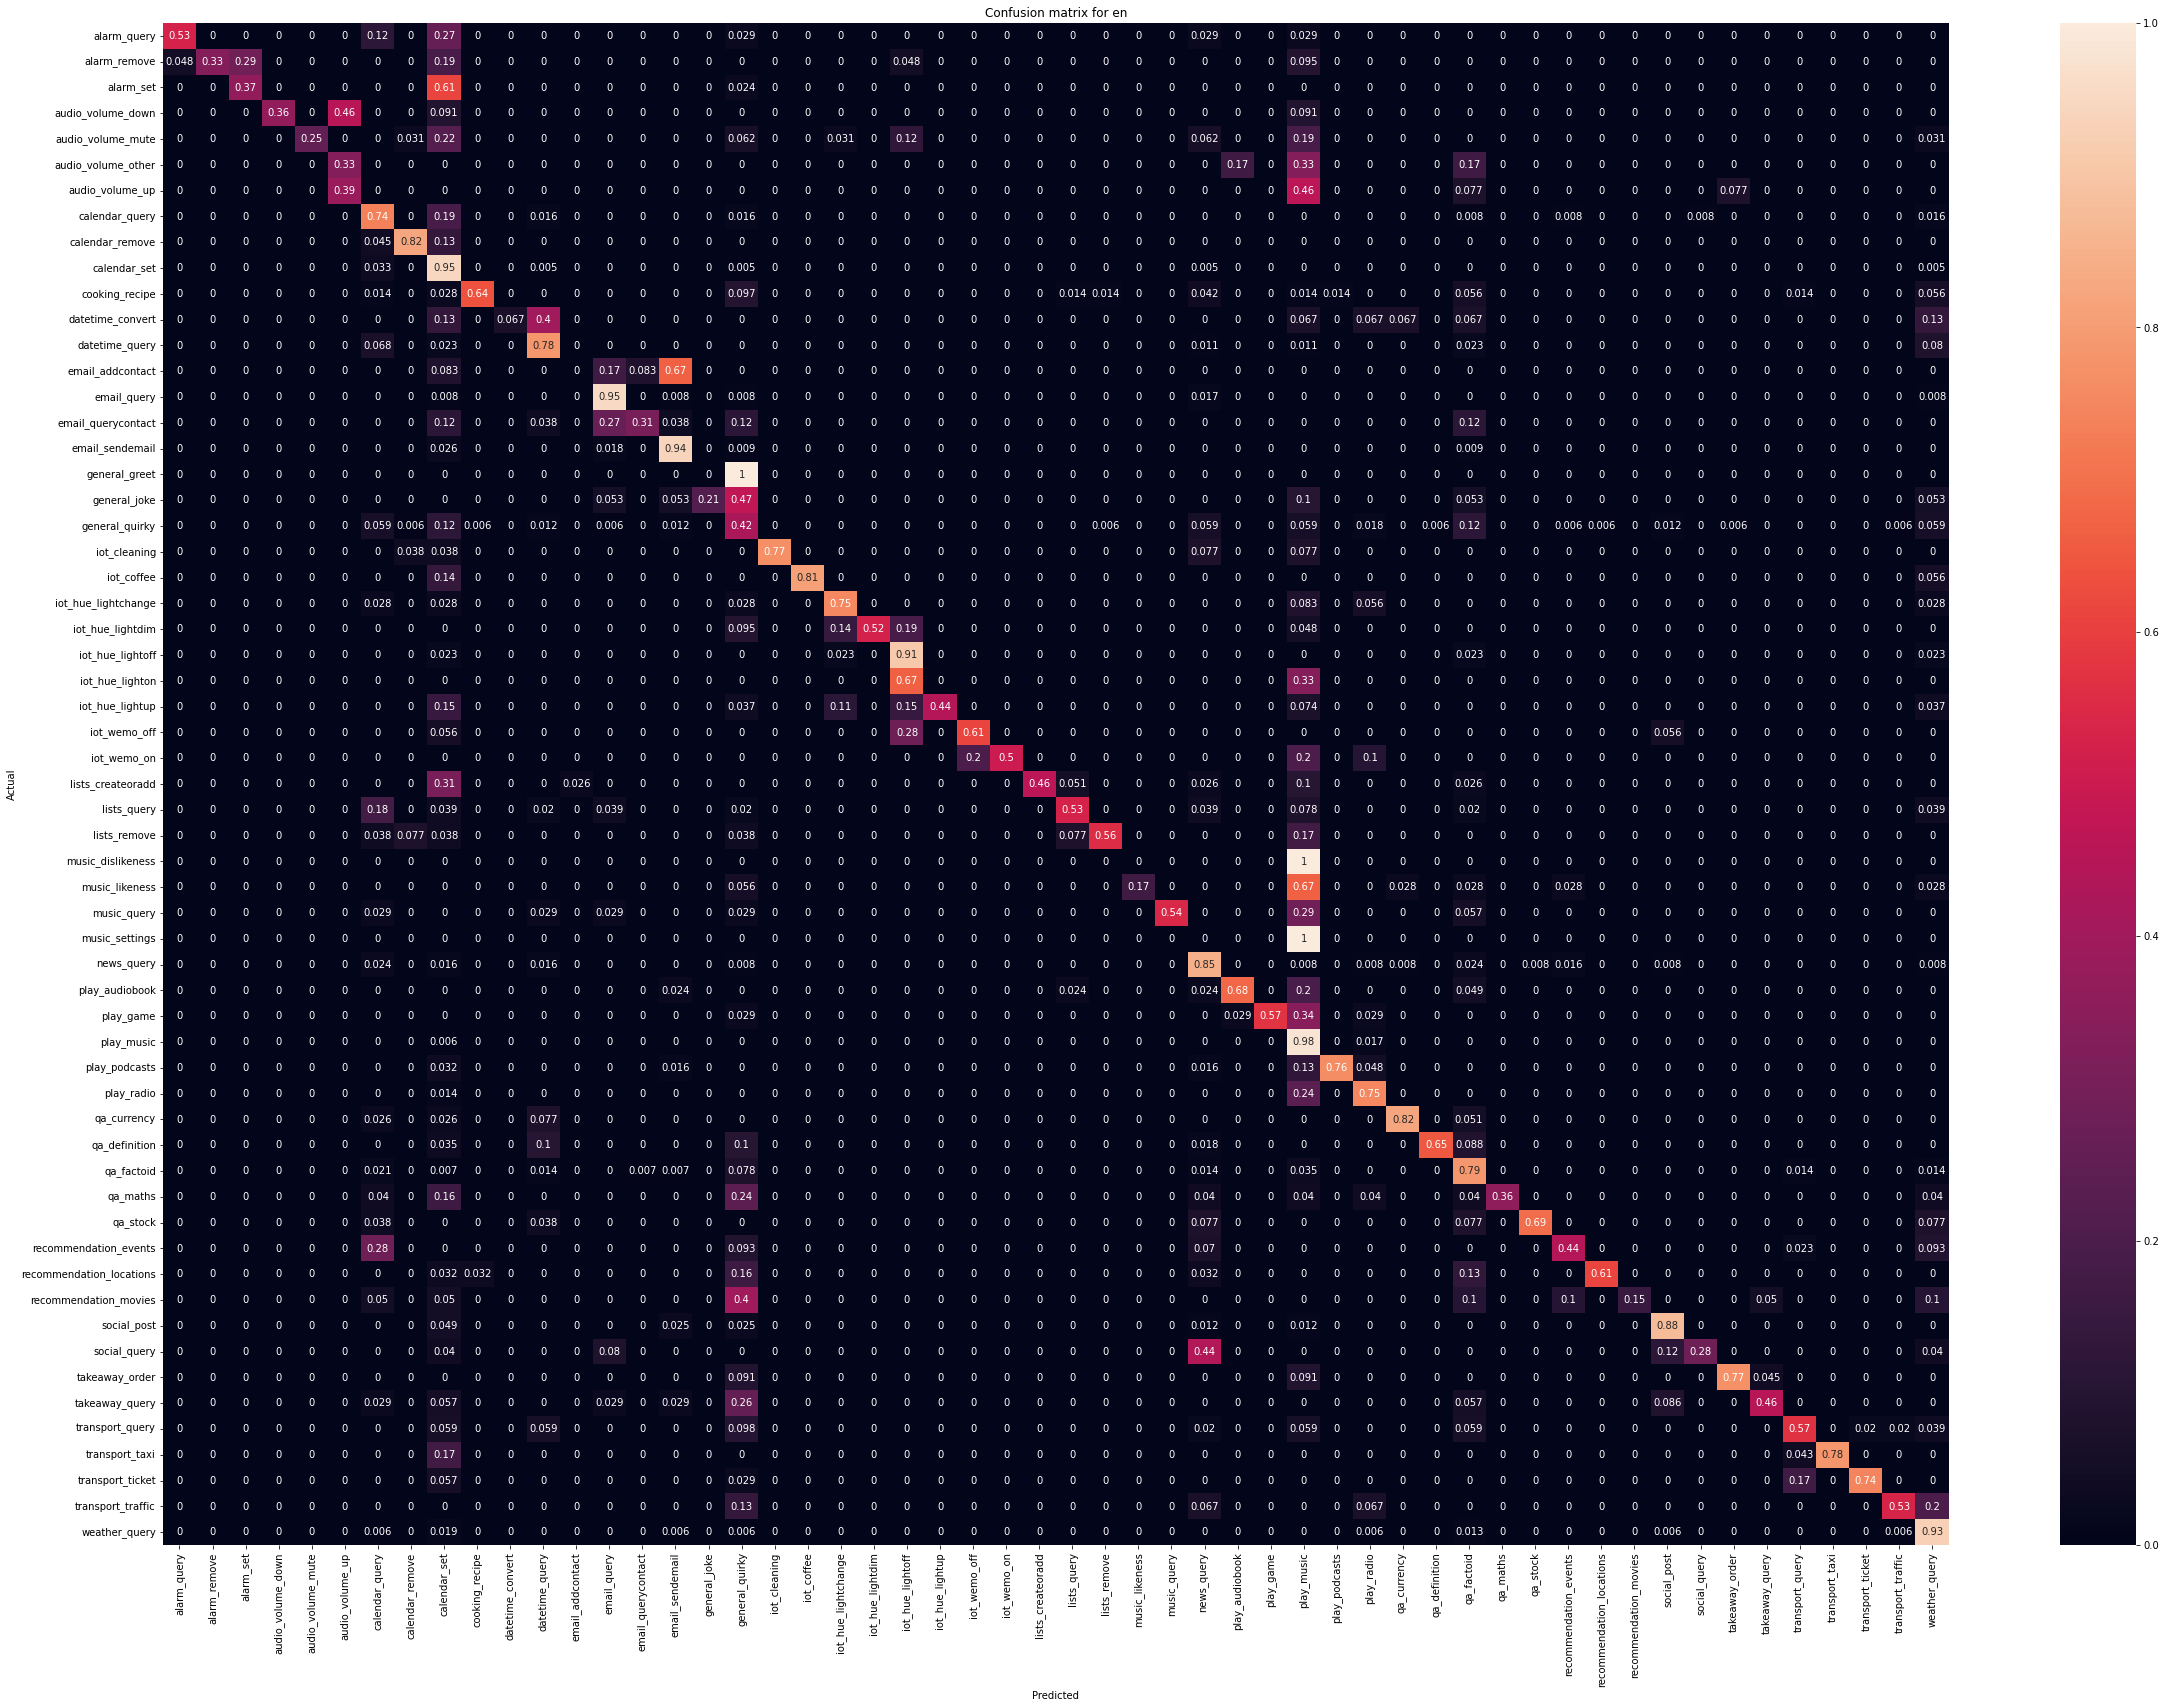

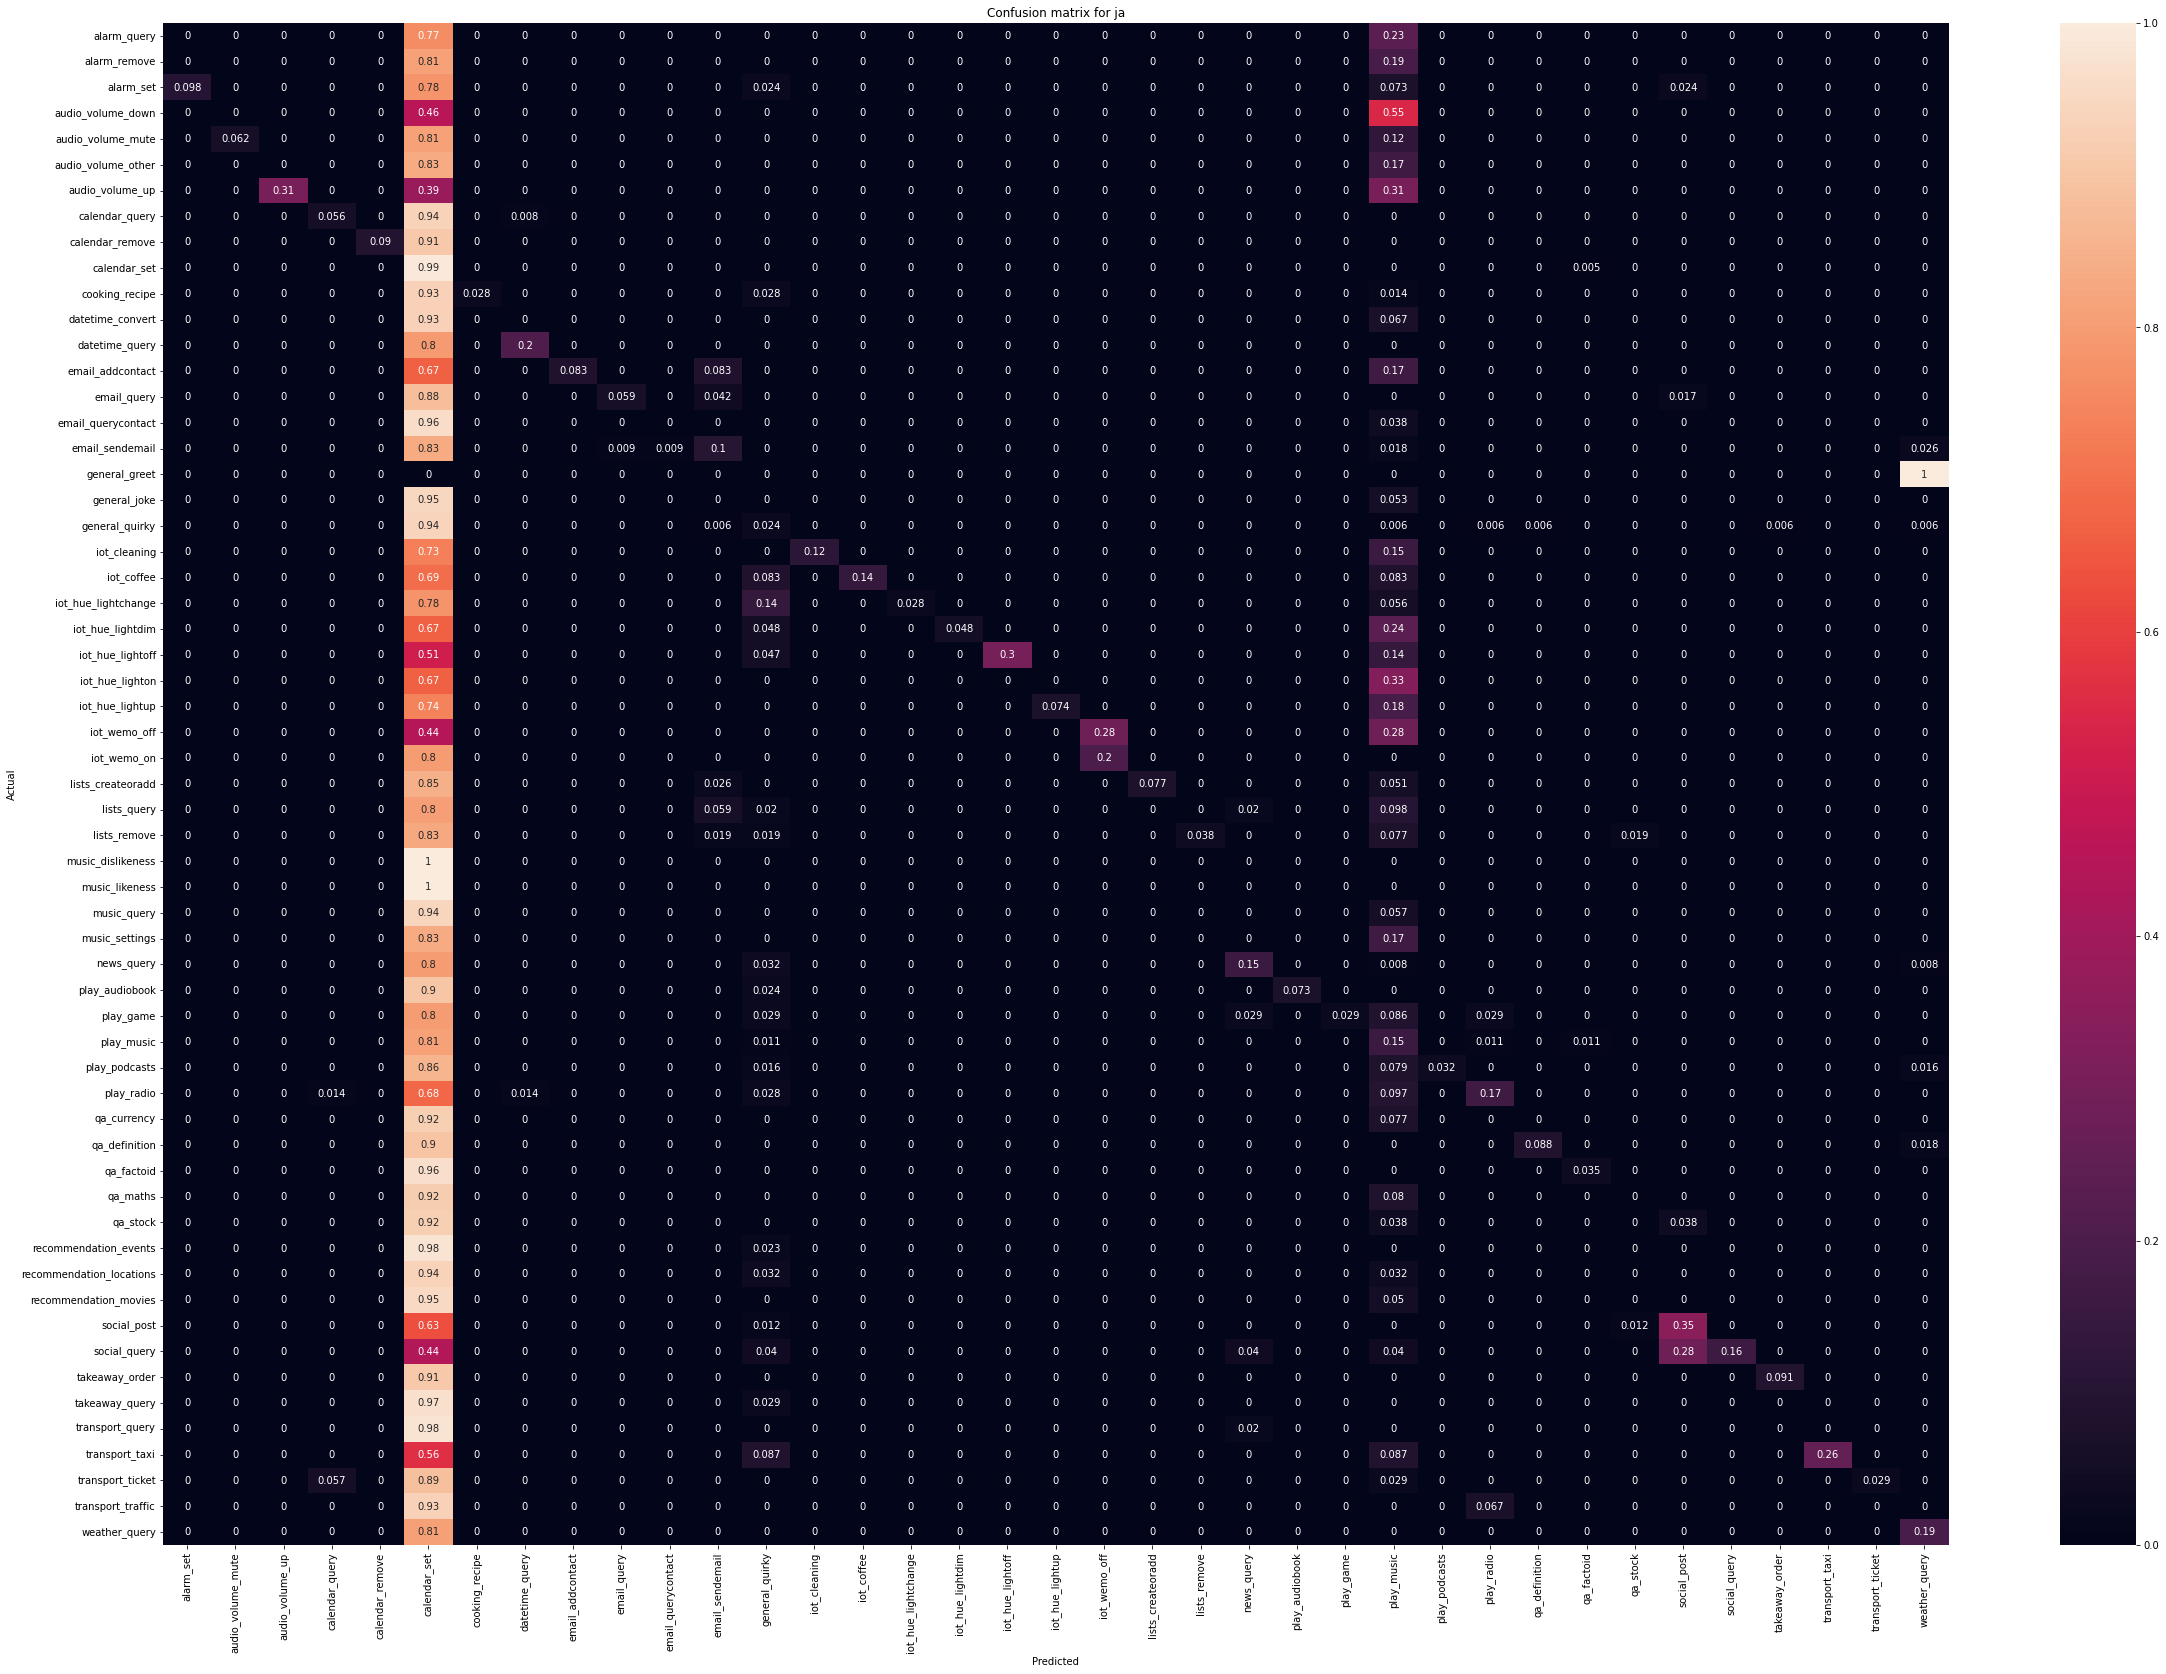

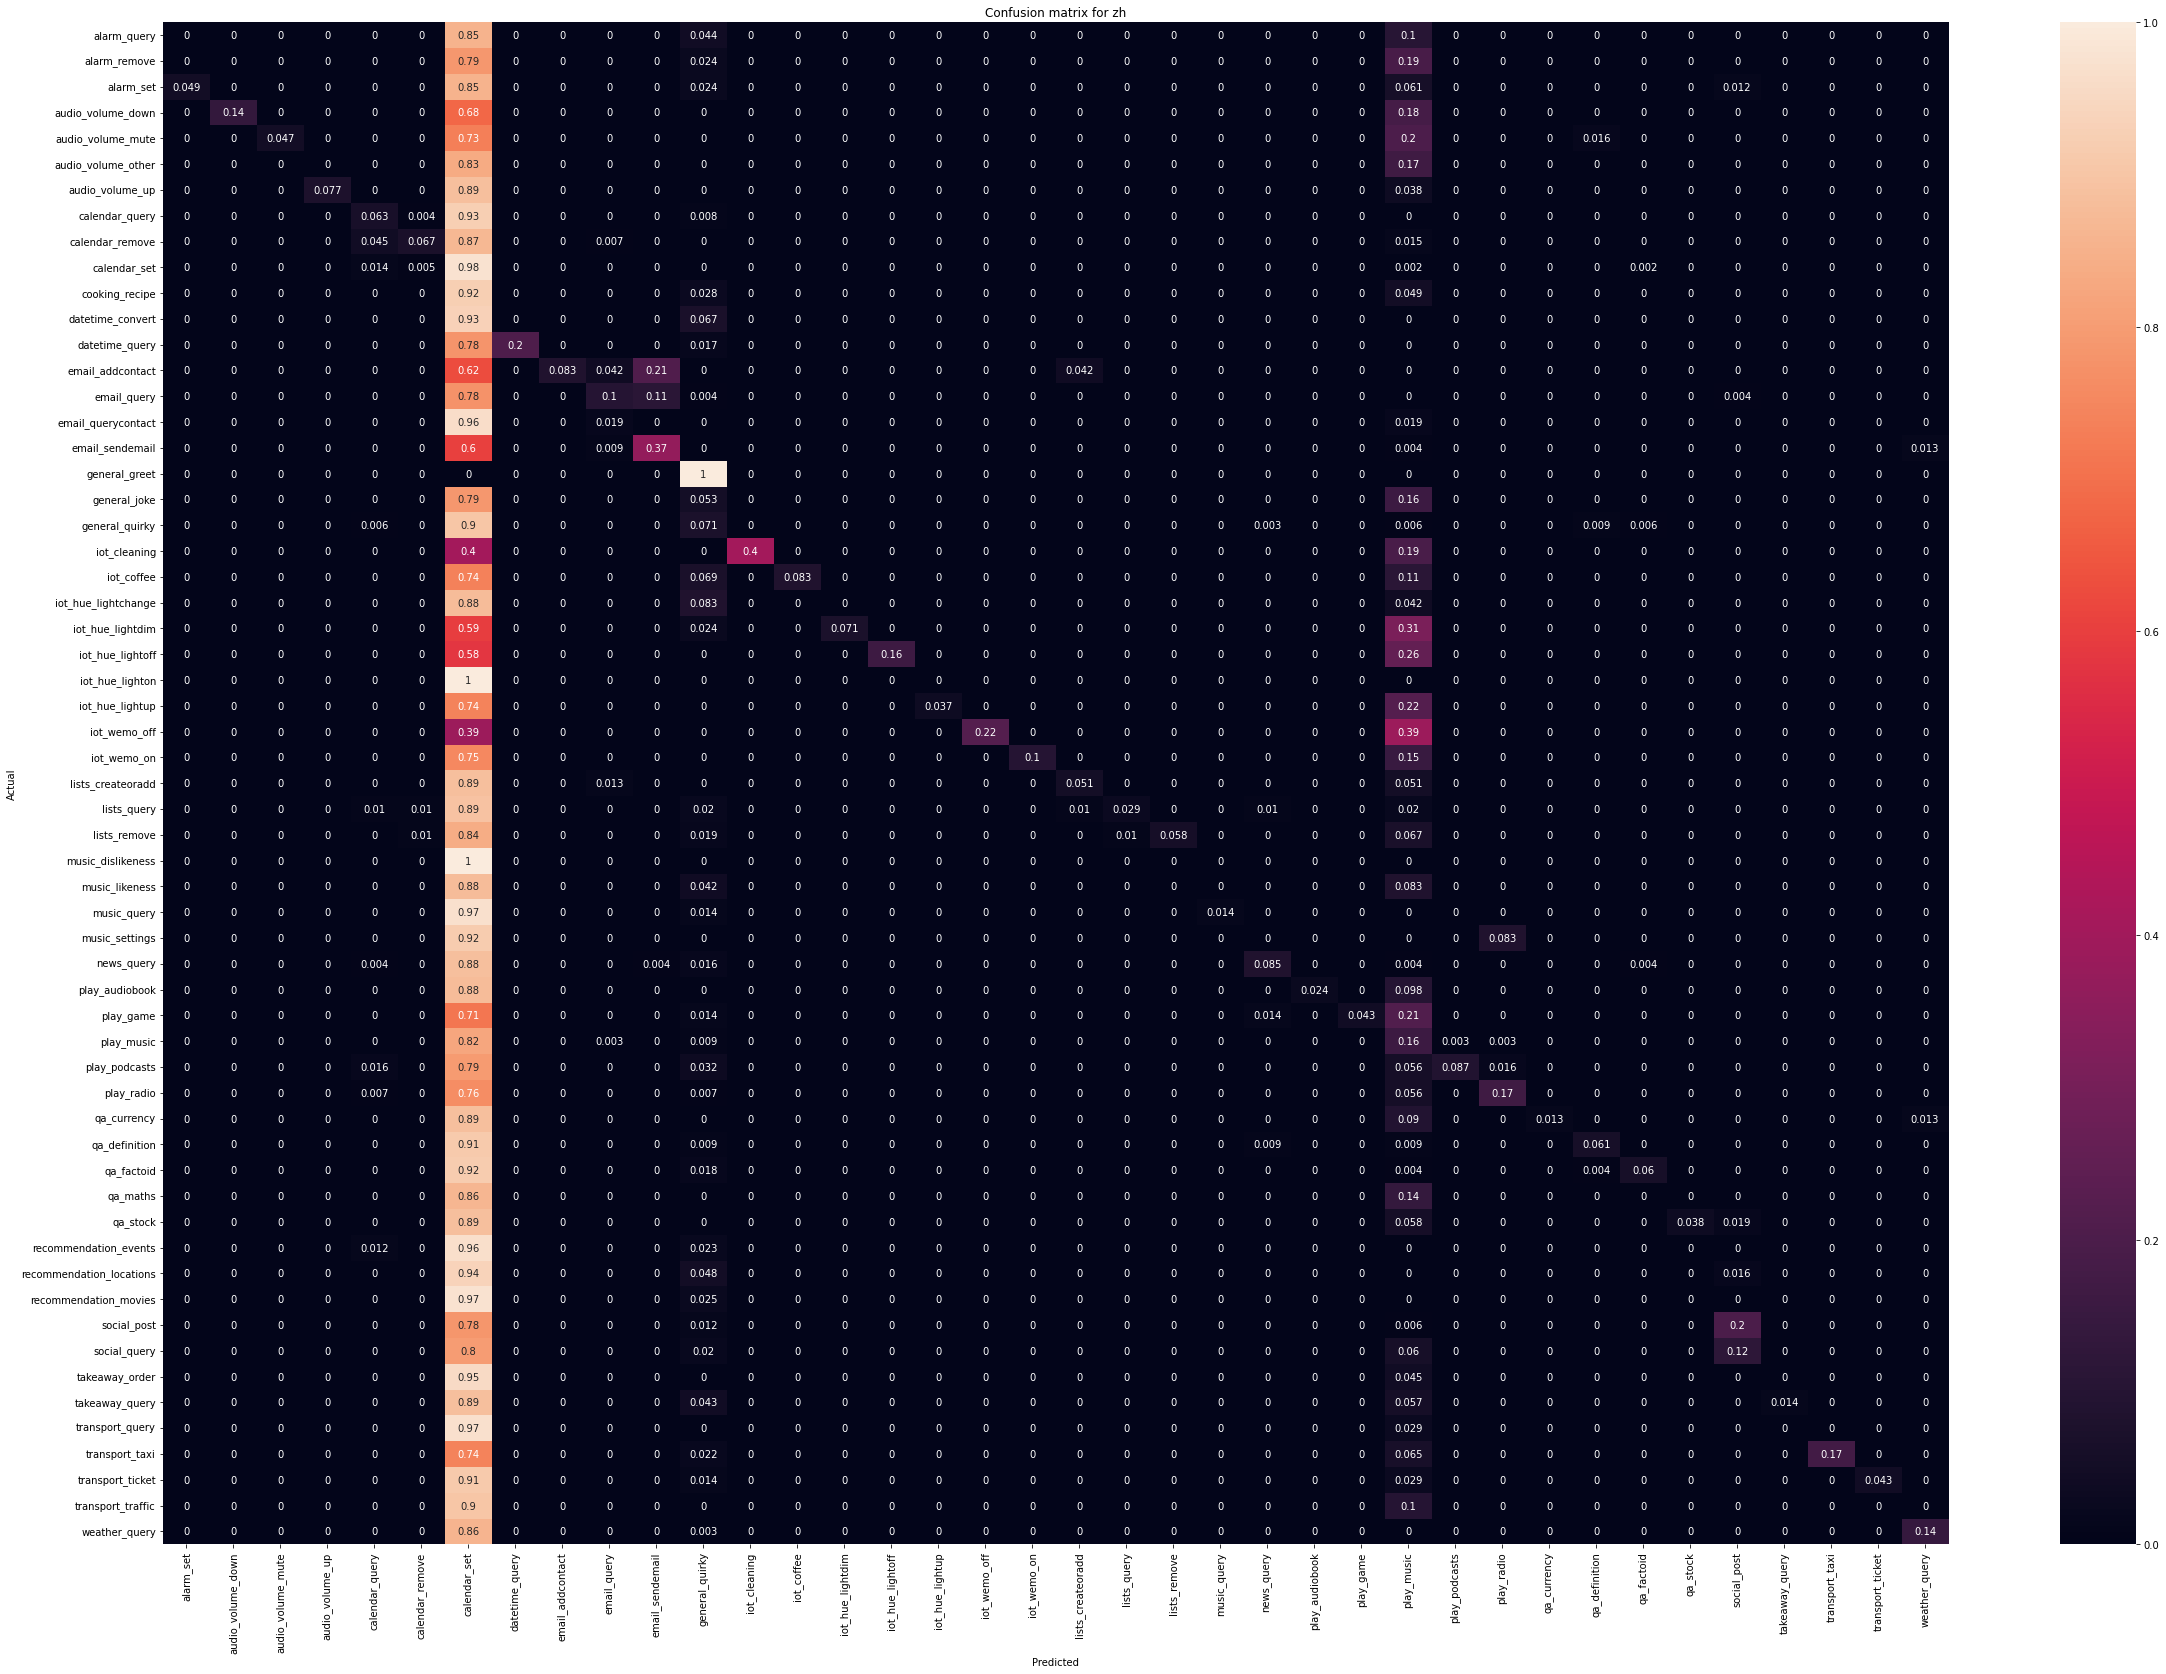

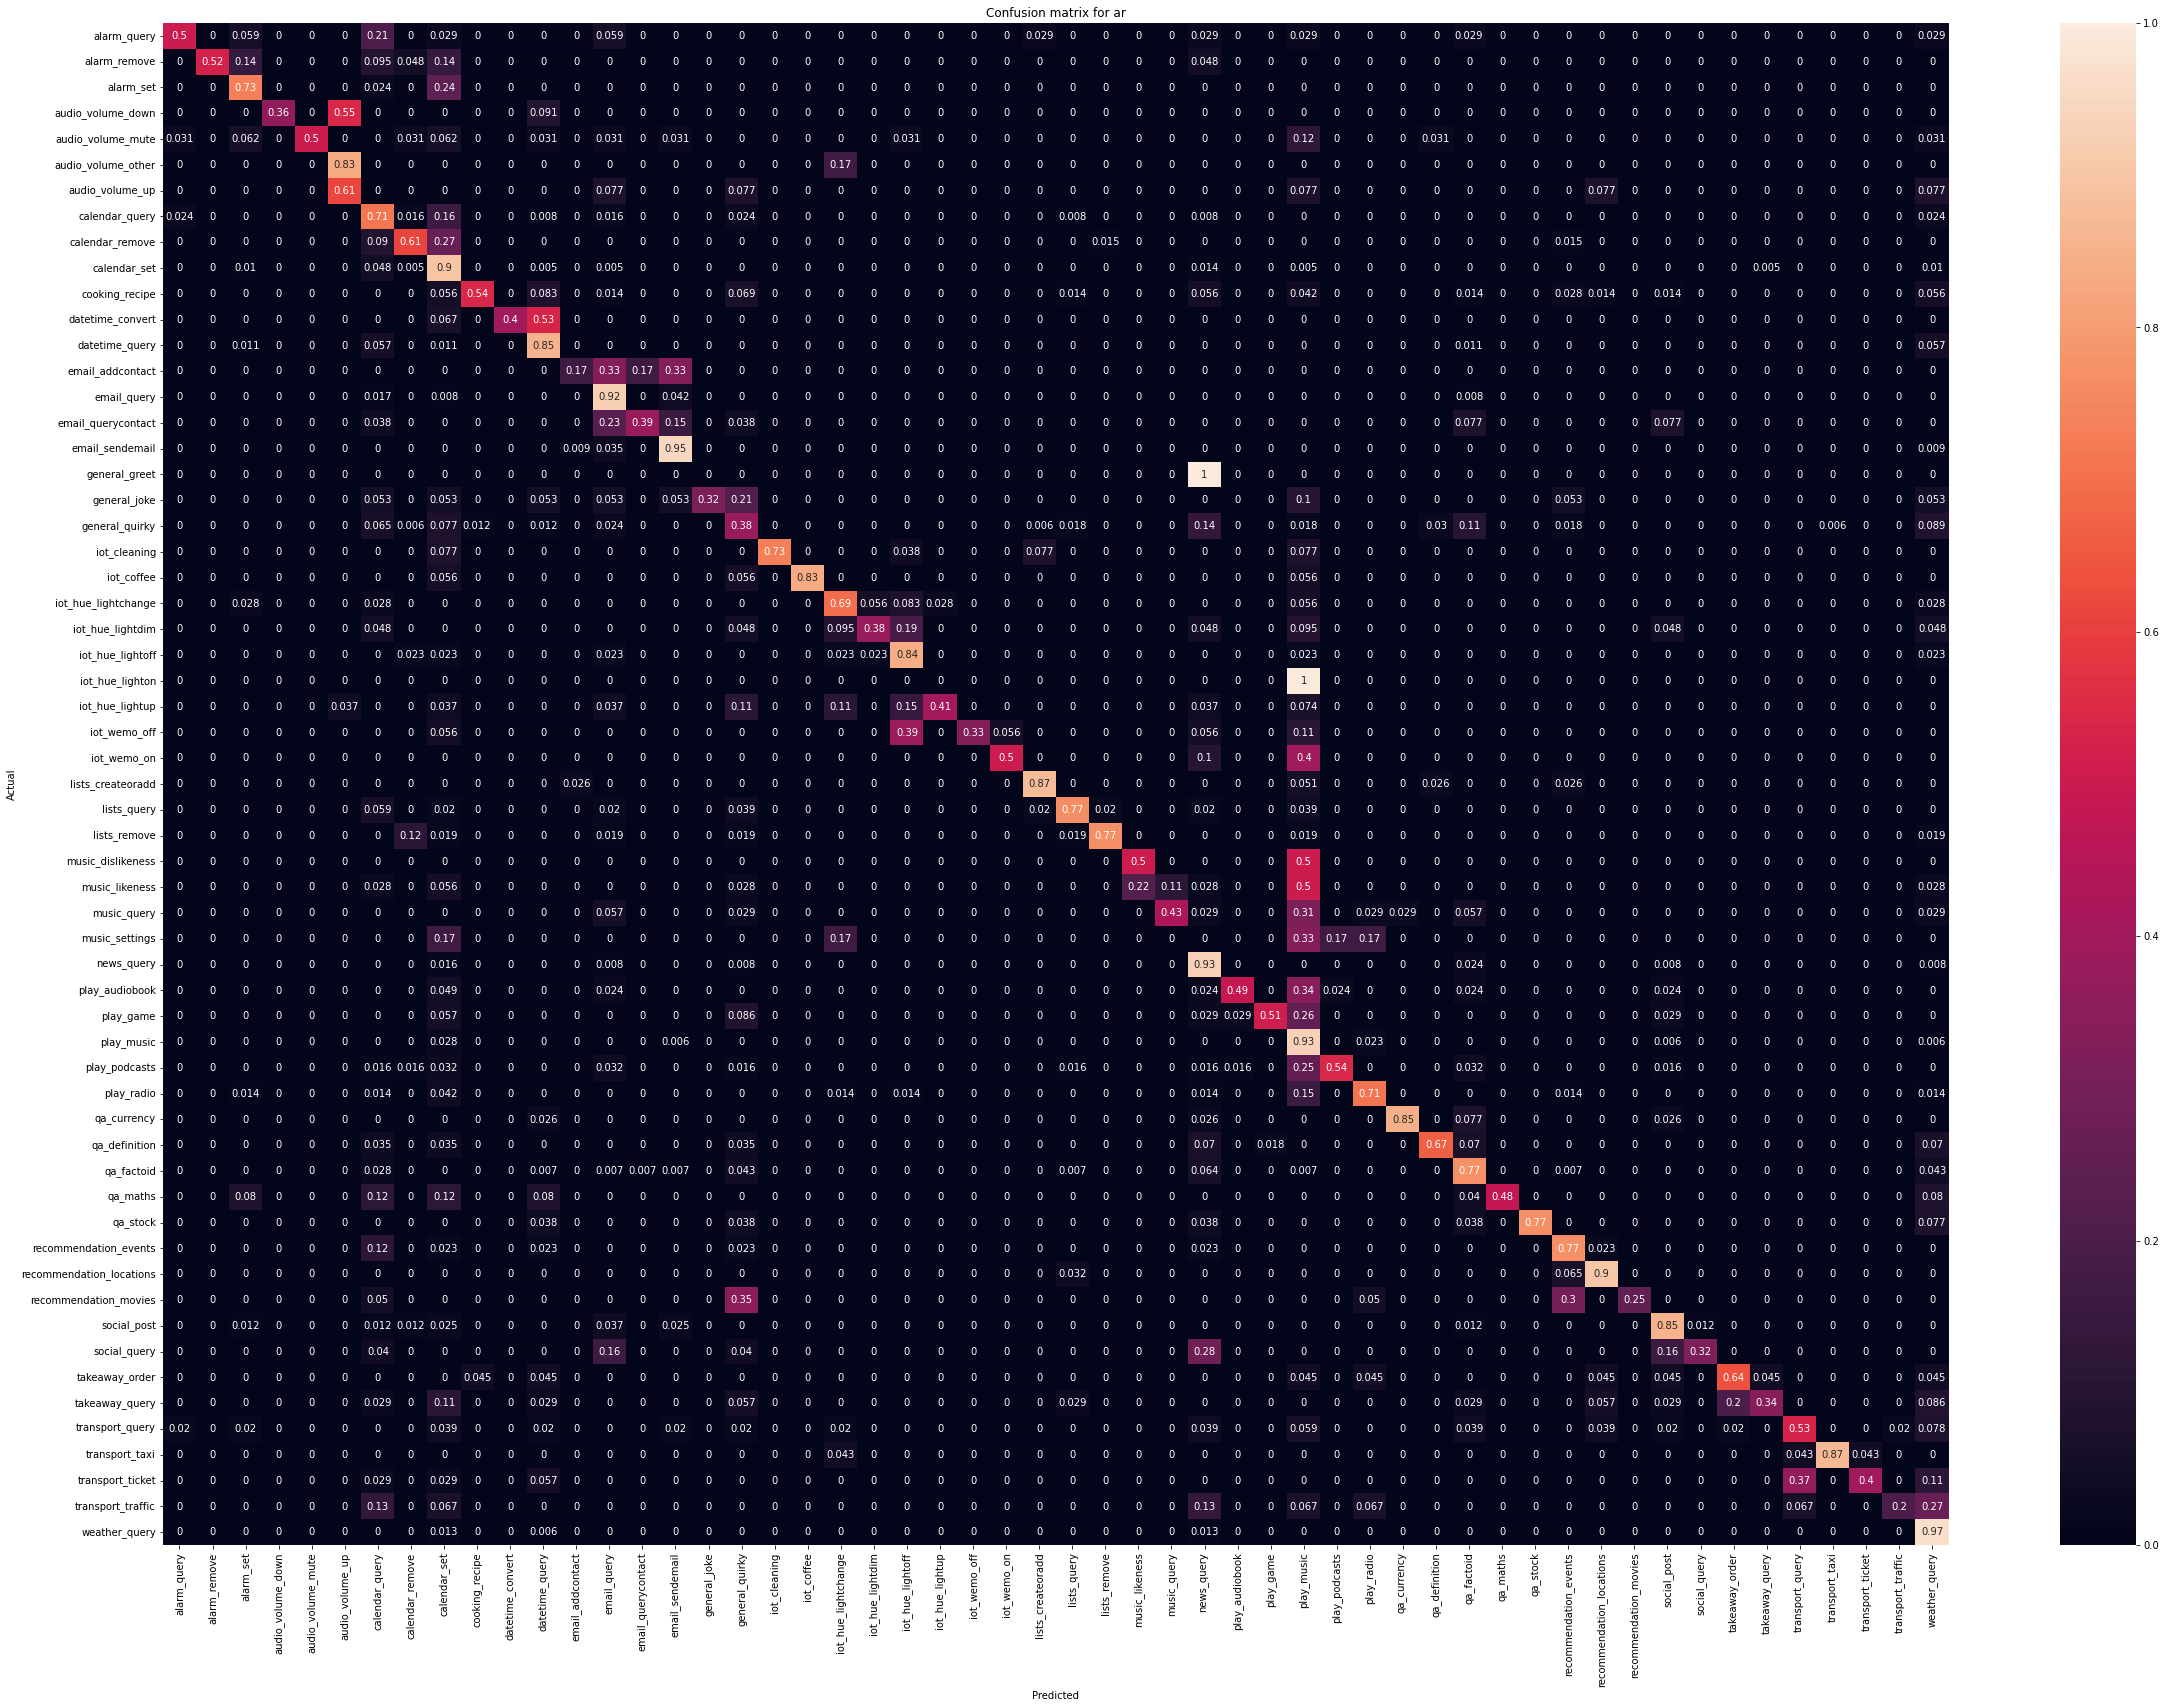

In [15]:
evaluate_model(clf, testing_inputs, testing_classes, encoder, indices)